# Ecommerce Capstone Project

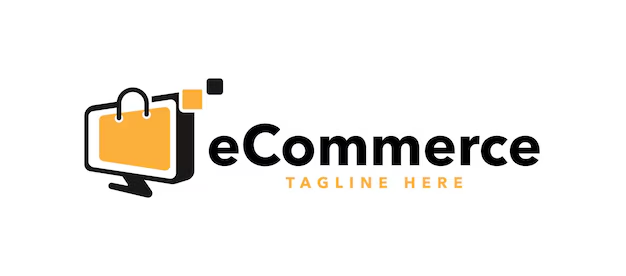


## CRM analysis 

* Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

* The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.

* Variable Description
1.	InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
2.	StockCode: Product code that consists 5 digits.
3.	Description: Product name.
4.	Quantity: The quantities of each product per transaction.
5.	InvoiceDate: This represents the day and time when each transaction was generated.
6.	UnitPrice: Product price per unit.
7.	CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
8.	Country: Name of the country where each customer resides.

Note: 
●	A negative quantity in this data set represents a "return transaction" instead of a "purchase transaction".
●	Transactions where the unit price is zero potentially indicate a free item


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
print("Setup Complete!")

Setup Complete!


In [2]:
crm_df = pd.read_csv(r"Ecom_CRM_analysis.csv", encoding='ISO-8859-1')
crm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
crm_df.shape

(541909, 8)

### Observation:- the data consist of 541909 rows and 8 columns 

In [5]:
crm_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Observation:- there are some data missing in Description column and CustomerID

since the data in Description is not so huge , we can get rid of it 

In [6]:
crm_df = crm_df.dropna(subset=['Description'])

In [7]:
# Count unique non-null values in the CustomerId column
unique_count = crm_df['CustomerID'].nunique()

print("Count of unique CustomerID values:", unique_count)

Count of unique CustomerID values: 4372


### Observation:- we have 4372 unique Customers

since the missing customerid is very big and unique customers are only limited, hence we can use the random filling of customer id instead of using mode

In [8]:
# Get unique non-null CustomerId values
unique_customer_ids = crm_df['CustomerID'].dropna().unique()

# Randomly fill missing CustomerId values with values from unique_customer_ids
crm_df['CustomerID'] = crm_df['CustomerID'].apply(
    lambda x: np.random.choice(unique_customer_ids) if pd.isnull(x) else x
)

# Verify if all missing values have been filled
print("Remaining missing values in CustomerId:", crm_df['CustomerID'].isnull().sum())

Remaining missing values in CustomerId: 0


In [9]:
crm_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Count of duplicate rows
duplicate_count = crm_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 5225


### Observation:- the data has 5225 duplicate entiries 

In [11]:
# Drop duplicate rows from the DataFrame
crm_df = crm_df.drop_duplicates()

# Verify if duplicates are removed
print("Number of duplicate rows after dropping:", crm_df.duplicated().sum())

Number of duplicate rows after dropping: 0


In [12]:
crm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Observation:- After all the cleaning of data we have 535230 rows of data and 8 columns 

## Dealing with Outliers

In [13]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [14]:
# Remove outliers from Quantity and UnitPrice columns
crm_df = remove_outliers_iqr(crm_df, 'Quantity')
crm_df = remove_outliers_iqr(crm_df, 'UnitPrice')

In [15]:
crm_df.describe()

,Quantity,UnitPrice,CustomerID
count,445025.000000,445025.000000,445025.000000
mean,4.805305,2.792097,15328.545709
std,4.602325,2.041368,1710.371105
min,-12.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15277.000000
75%,8.000000,3.750000,16818.000000
max,23.000000,8.620000,18287.000000


In [16]:
# Optimize datatypes
crm_df['InvoiceNo'] = crm_df['InvoiceNo'].astype(str)
crm_df['StockCode'] = crm_df['StockCode'].astype(str)
crm_df['Description'] = crm_df['Description'].astype(str)
crm_df['Quantity'] = crm_df['Quantity'].astype('int16')
crm_df['InvoiceDate'] = pd.to_datetime(crm_df['InvoiceDate'])
crm_df['UnitPrice'] = crm_df['UnitPrice'].astype('float32')
crm_df['CustomerID'] = crm_df['CustomerID'].astype('int32')
crm_df['Country'] = crm_df['Country'].astype('category')
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445025 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    445025 non-null  object        
 1   StockCode    445025 non-null  object        
 2   Description  445025 non-null  object        
 3   Quantity     445025 non-null  int16         
 4   InvoiceDate  445025 non-null  datetime64[ns]
 5   UnitPrice    445025 non-null  float32       
 6   CustomerID   445025 non-null  int32         
 7   Country      445025 non-null  category      
dtypes: category(1), datetime64[ns](1), float32(1), int16(1), int32(1), object(3)
memory usage: 21.6+ MB


In [17]:
number_of_invoices = crm_df['InvoiceNo'].nunique()
print(f"There are {number_of_invoices} unique InvoiceNo values in the DataFrame.")

There are 20951 unique InvoiceNo values in the DataFrame.


### Observation:- there are 20951 unique Invoice Numbers in the dataframe

In [18]:
Cancelled_Invoices = crm_df[crm_df['InvoiceNo'].str.startswith('C')]

print(f"There are {Cancelled_Invoices.shape[0]} cancelled invoices")

There are 6789 cancelled invoices


### Observation:- There are 6789 cancelled orders 

In [19]:

cancelled_orders = crm_df[crm_df['InvoiceNo'].str.startswith('C', na=False)]
cancelled_by_country = cancelled_orders['Country'].value_counts()
print("Countries with Maximum Cancelled Orders:")
print(cancelled_by_country.head())

Countries with Maximum Cancelled Orders:
Country
United Kingdom    5755
Germany            374
EIRE               206
France              89
USA                 82
Name: count, dtype: int64


In [20]:
Count_Return_Transactions = (crm_df['Quantity'] < 0).sum()

print(f"Number of return transactions: {Count_Return_Transactions}")

Number of return transactions: 6850


### Observation:- Total number of return transactions are 6850

In [21]:
# Filter for rows where Quantity is negative (returns)
returns = crm_df[crm_df['Quantity'] < 0]
total_items_returned = (returns['Quantity'].sum())*(-1)

print(f"Total Quantity of Items Returned: {total_items_returned}")


Total Quantity of Items Returned: 23244


### Observation:- Total Items returned so far are 23344

In [22]:
Potential_Free_Items = (crm_df['UnitPrice'] == 0).sum()

print(f"Number of potential free items given: {Potential_Free_Items}")

Number of potential free items given: 538


### Observation:- Total Number of potential free items are 538

In [23]:
# Group by 'Description' to aggregate product popularity
product_popularity = crm_df.groupby('Description').agg(
    total_quantity_sold=('Quantity', 'sum'),    # Total quantity sold per product
    total_sales=('Quantity', 'count'),          # Number of times each product was sold
    unique_customers=('CustomerID', 'nunique')  # Unique customers who bought each product
).reset_index()

# Sort by total quantity sold to find the most popular products
product_popularity = product_popularity.sort_values(by='total_quantity_sold', ascending=False)

# Display the top 10 most popular products
print("Top 10 Most Popular Products:")
print(product_popularity.head(10))


Top 10 Most Popular Products:
                             Description  total_quantity_sold  total_sales  \
1725             JUMBO BAG RED RETROSPOT                13930         1855   
208        ASSORTED COLOUR BIRD ORNAMENT                10915         1090   
3660  WHITE HANGING HEART T-LIGHT HOLDER                10806         1964   
1892             LUNCH BAG RED RETROSPOT                10374         1484   
1884             LUNCH BAG  BLACK SKULL.                 8103         1260   
1887                 LUNCH BAG CARS BLUE                 7838         1127   
1691              JAM MAKING SET PRINTED                 7582         1026   
1723             JUMBO BAG PINK POLKADOT                 7400         1125   
1886              LUNCH BAG APPLE DESIGN                 7359         1007   
1894          LUNCH BAG SPACEBOY DESIGN                  7206         1135   

      unique_customers  
1725               973  
208                643  
3660               996  
1892       

In [24]:
crm_df['TotalSales'] = crm_df["Quantity"] * crm_df["UnitPrice"]

In [25]:
total_sales = crm_df['TotalSales'].sum()

print(f"Total Sales Made So Far: $ {total_sales}")

Total Sales Made So Far: $ 4770377.0


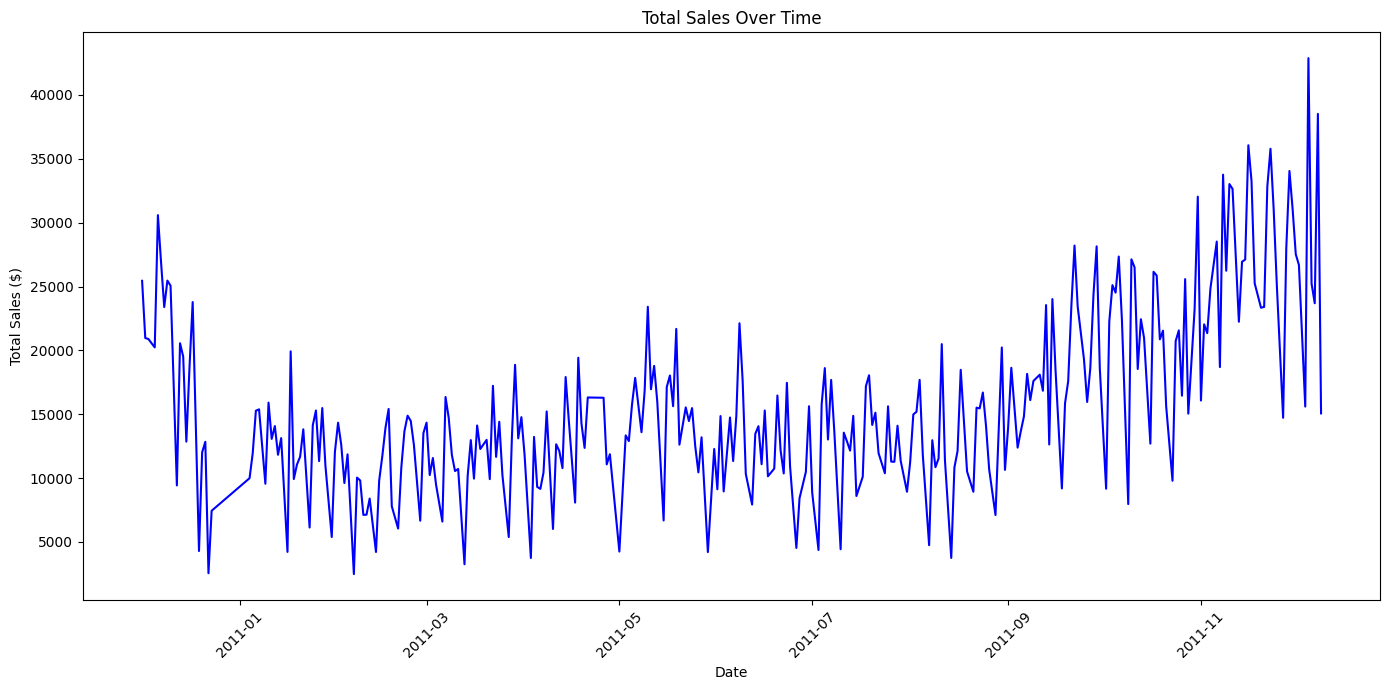

In [26]:
# Aggregate data by invoice date
daily_data = crm_df.groupby(crm_df['InvoiceDate'].dt.date).agg({
    'TotalSales': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()
daily_data.rename(columns={'InvoiceNo': 'TransactionCount', 'InvoiceDate': 'Date'}, inplace=True)

# Plot 1: Total Sales over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_data, x='Date', y='TotalSales', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

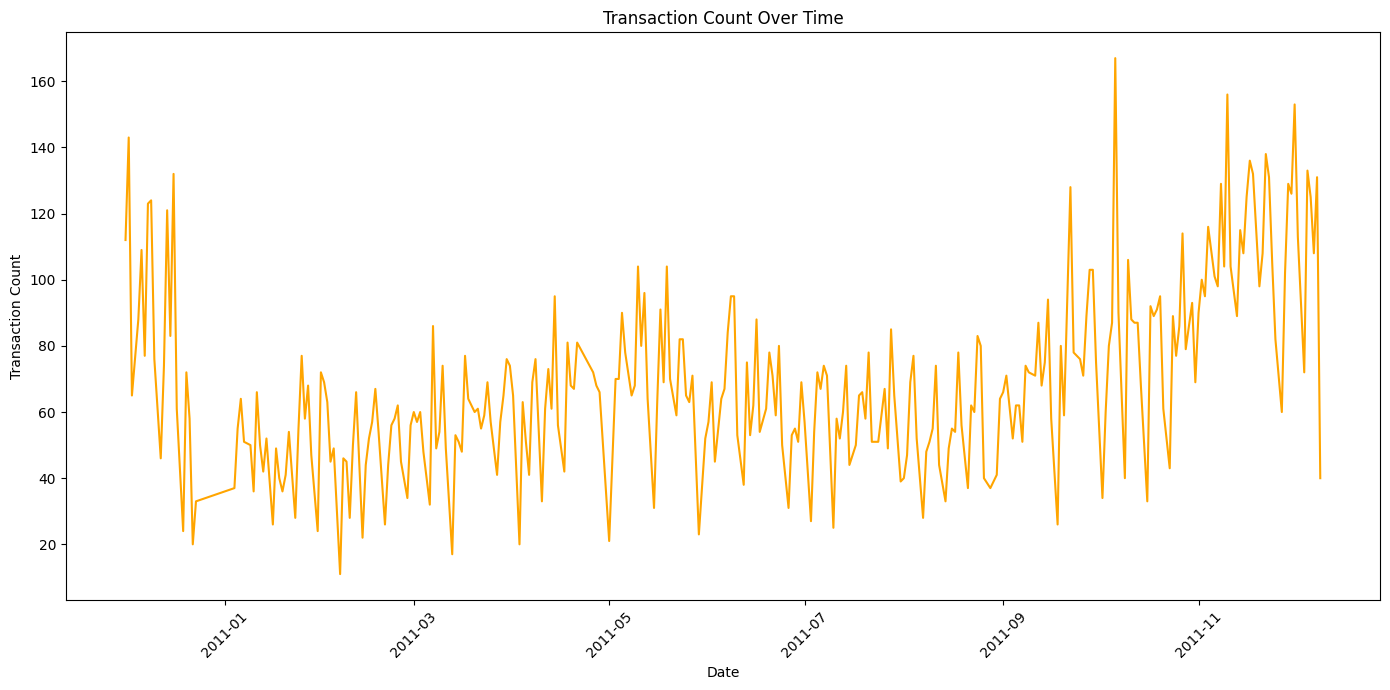

In [27]:

# Plot 2: Transaction Count over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_data, x='Date', y='TransactionCount', color='orange')
plt.title('Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

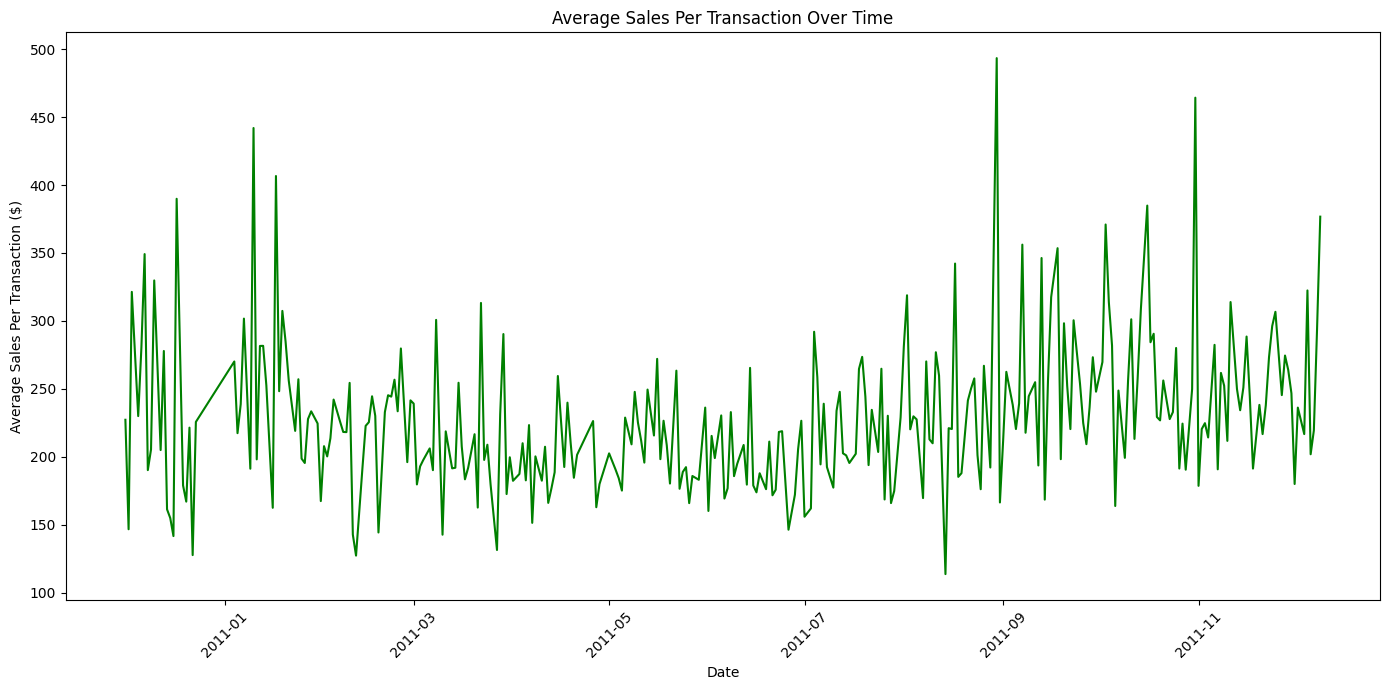

In [28]:
# Plot 3: Average Sales per Transaction Over Time
daily_data['AvgSalesPerTransaction'] = daily_data['TotalSales'] / daily_data['TransactionCount']
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_data, x='Date', y='AvgSalesPerTransaction', color='green')
plt.title('Average Sales Per Transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales Per Transaction ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chrun Cases

considering 4 months time period for churning

In [29]:
last_date = crm_df['InvoiceDate'].max()
churn_threshold_date = last_date - timedelta(days=4*30)  # Roughly 4 months

# Identify churned customers: those who made their last purchase before the churn_threshold_date
last_purchase_date = crm_df.groupby('CustomerID')['InvoiceDate'].max()
churned_customers = last_purchase_date[last_purchase_date < churn_threshold_date].index

# Calculate churn rate and churn percentage
total_customers = crm_df['CustomerID'].nunique()
churned_count = len(churned_customers)
churn_rate = churned_count / total_customers
churn_percentage = churn_rate * 100

# Display the results
print("Churn Rate:", churn_rate)
print("Churn Percentage:", churn_percentage)

Churn Rate: 0.0
Churn Percentage: 0.0


In [30]:
# Calculate the difference in days between each purchase for each customer
crm_df = crm_df.sort_values(['CustomerID', 'InvoiceDate'])
crm_df['PrevPurchaseDate'] = crm_df.groupby('CustomerID')['InvoiceDate'].shift(1)
crm_df['DaysBetweenPurchases'] = (crm_df['InvoiceDate'] - crm_df['PrevPurchaseDate']).dt.days

# Calculate average days between purchases for each customer
avg_days_df = crm_df.groupby('CustomerID')['DaysBetweenPurchases'].mean().reset_index()
avg_days_df.columns = ['CustomerID', 'AvgDaysBetweenPurchases']


In [31]:
# Extract day of the week for each purchase
crm_df['PurchaseDay'] = crm_df['InvoiceDate'].dt.day_name()

# Find the most common shopping day for each customer
preferred_days_df = crm_df.groupby('CustomerID')['PurchaseDay'].agg(lambda x: x.mode()[0]).reset_index()
preferred_days_df.columns = ['CustomerID', 'PreferredShoppingDay']
preferred_days_df.head(10)


,CustomerID,PreferredShoppingDay
0,12346,Monday
1,12347,Tuesday
2,12348,Tuesday
3,12349,Monday
4,12350,Wednesday
5,12352,Tuesday
6,12353,Tuesday
7,12354,Thursday
8,12355,Monday
9,12356,Friday


In [32]:
# Extract hour of the day for each purchase
crm_df['PurchaseHour'] = crm_df['InvoiceDate'].dt.hour

# Find the most common shopping hour for each customer
peak_hours_df = crm_df.groupby('CustomerID')['PurchaseHour'].agg(lambda x: x.mode()[0]).reset_index()
peak_hours_df.columns = ['CustomerID', 'PeakShoppingHour']
peak_hours_df.head(10)


,CustomerID,PeakShoppingHour
0,12346,16
1,12347,14
2,12348,9
3,12349,9
4,12350,16
5,12352,14
6,12353,15
7,12354,13
8,12355,13
9,12356,12


In [33]:
# Calculate revenue for each purchase
crm_df['Revenue'] = crm_df['Quantity'] * crm_df['UnitPrice']

# Sum revenue for each customer to estimate CLV
clv_df = crm_df.groupby('CustomerID')['Revenue'].sum().reset_index()
clv_df.columns = ['CustomerID', 'CustomerLifetimeValue']
clv_df.head(10)


,CustomerID,CustomerLifetimeValue
0,12346,209.820007
1,12347,3200.219971
2,12348,118.589996
3,12349,1409.979980
4,12350,458.850006
5,12352,1291.270020
6,12353,244.370010
7,12354,840.299988
8,12355,394.160004
9,12356,904.729980


In [34]:
# Merge all metrics into a single DataFrame
customer_metrics = avg_days_df.merge(preferred_days_df, on='CustomerID', how='left') \
                              .merge(peak_hours_df, on='CustomerID', how='left') \
                              .merge(clv_df, on='CustomerID', how='left')

# Display the result
customer_metrics.head()


,CustomerID,AvgDaysBetweenPurchases,PreferredShoppingDay,PeakShoppingHour,CustomerLifetimeValue
0,12346,12.241379,Monday,16,209.820007
1,12347,1.955056,Tuesday,14,3200.219971
2,12348,20.058824,Tuesday,9,118.589996
3,12349,3.955556,Monday,9,1409.979980
4,12350,8.500000,Wednesday,16,458.850006


In [35]:
top_10_values = customer_metrics['CustomerLifetimeValue'].nlargest(10)

mask = customer_metrics['CustomerLifetimeValue'].isin(top_10_values)

top_10_customers = customer_metrics[mask]

top_10_customers

,CustomerID,AvgDaysBetweenPurchases,PreferredShoppingDay,PeakShoppingHour,CustomerLifetimeValue
330,12748,0.073591,Wednesday,11,19086.359375
568,13089,0.253313,Tuesday,14,27223.500000
1295,14088,1.008876,Wednesday,15,17600.550781
1300,14096,0.074675,Monday,15,38465.308594
1345,14156,0.410501,Tuesday,14,16615.708984
1895,14911,0.062730,Monday,12,76052.242188
1980,15039,0.239286,Wednesday,11,14942.200195
2192,15311,0.154303,Tuesday,13,14313.129883
3925,17675,0.567657,Wednesday,13,14059.479492
4042,17841,0.039822,Wednesday,12,31494.449219


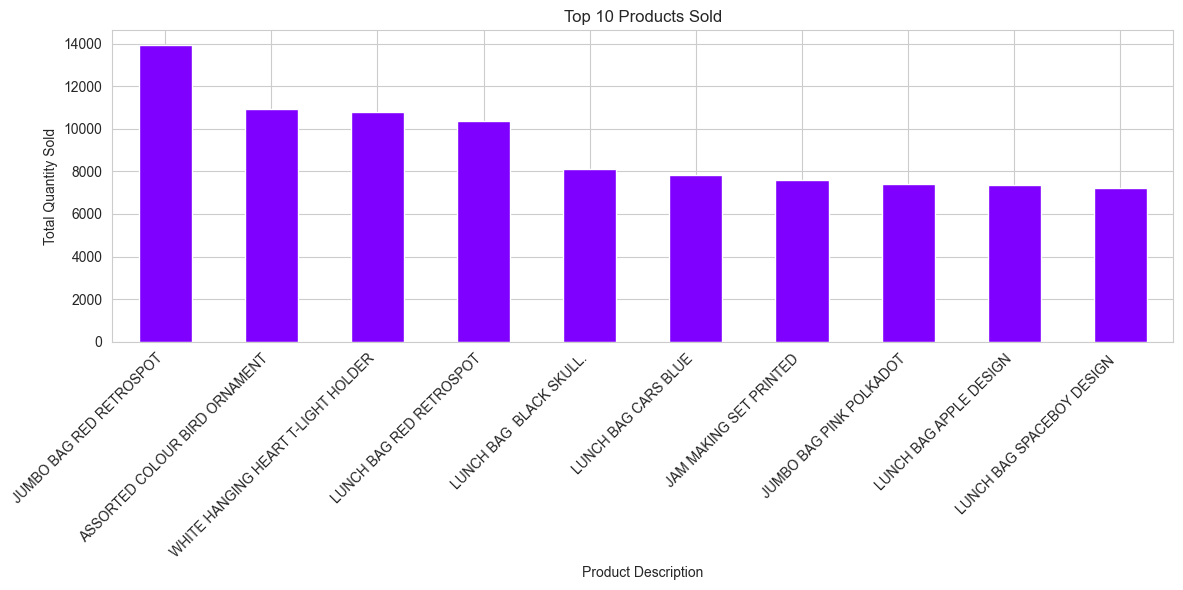

In [36]:
# Calculate total quantity sold per product
top_products = crm_df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
top_products.plot(kind='bar', colormap='rainbow')
plt.title("Top 10 Products Sold")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\tripa\AppData\Local\Temp\ipykernel_13248\3668354794.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers_by_country = crm_df.groupby('Country')['CustomerID'].nunique().nlargest(10)


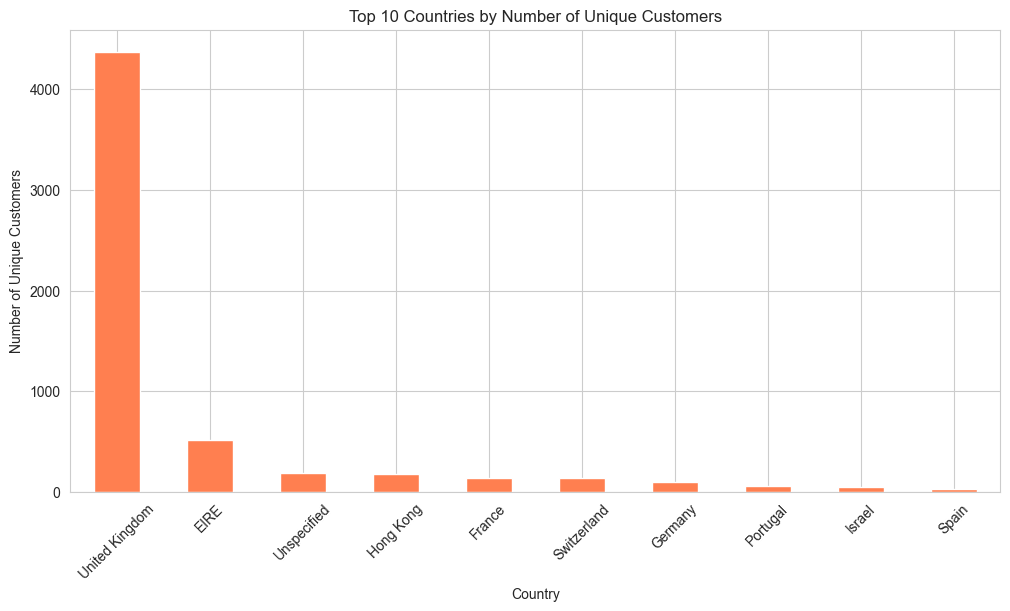

In [37]:
# Calculate unique customers per country
customers_by_country = crm_df.groupby('Country')['CustomerID'].nunique().nlargest(10)

# Plot customer segmentation by country
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
customers_by_country.plot(kind='bar', color='coral')
plt.title("Top 10 Countries by Number of Unique Customers")
plt.xlabel("Country")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.show()

C:\Users\tripa\AppData\Local\Temp\ipykernel_13248\1108411294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_country = crm_df.groupby('Country')['Revenue'].sum().nlargest(10)


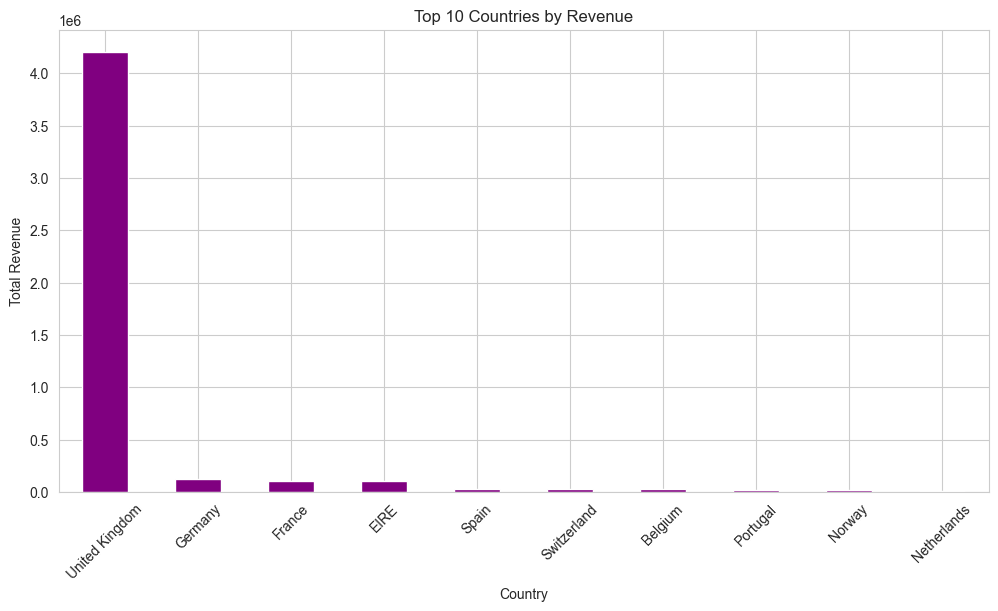

In [38]:
# Calculate total revenue by country
crm_df['Revenue'] = crm_df['Quantity'] * crm_df['UnitPrice']
revenue_by_country = crm_df.groupby('Country')['Revenue'].sum().nlargest(10)

# Plot revenue by country
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
revenue_by_country.plot(kind='bar', color='purple')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


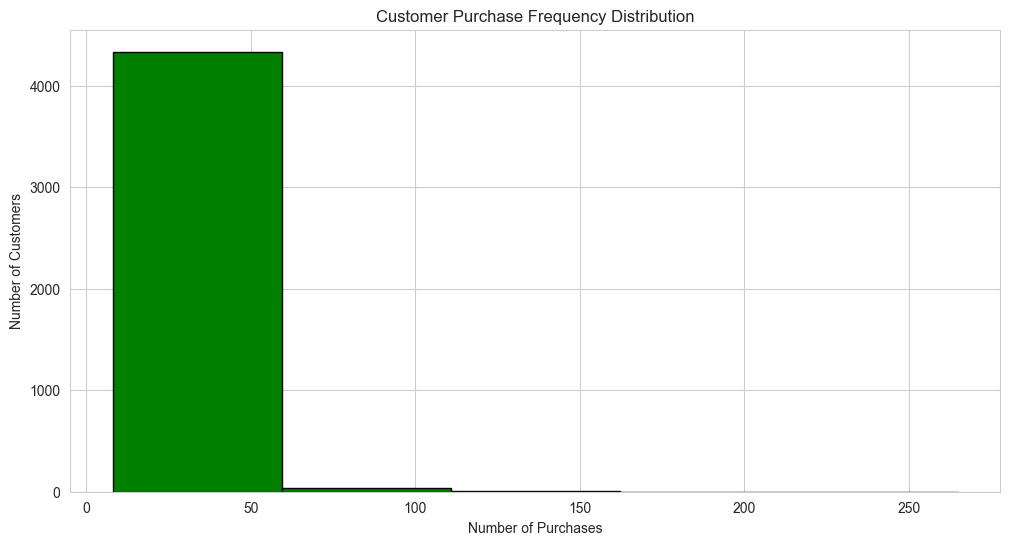

In [39]:
# Calculate the number of purchases per customer
purchase_frequency = crm_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Plot the customer purchase frequency
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
purchase_frequency.plot(kind='hist', bins=5, color='green', edgecolor='black')
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


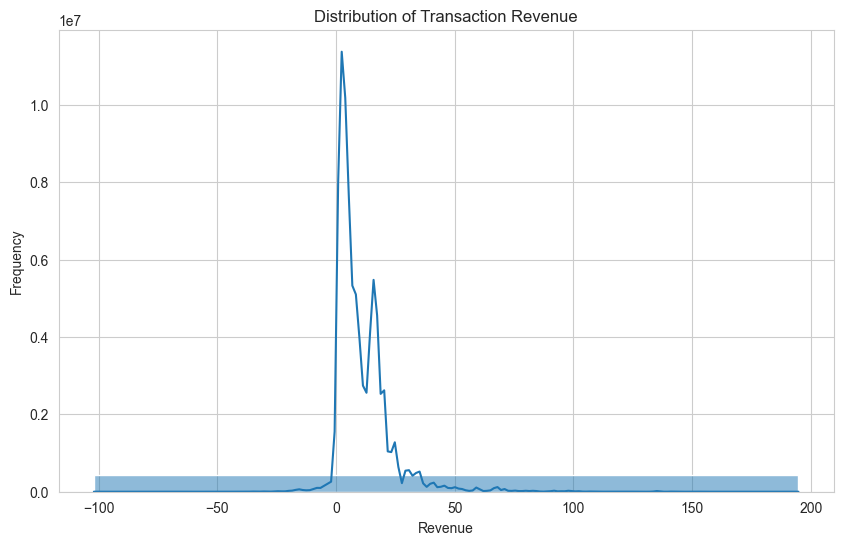

In [40]:
# Calculate revenue for each transaction
crm_df['Revenue'] = crm_df['Quantity'] * crm_df['UnitPrice']

# Plot histogram of revenue distribution
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(crm_df['Revenue'], bins=1, kde=True)
plt.title('Distribution of Transaction Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


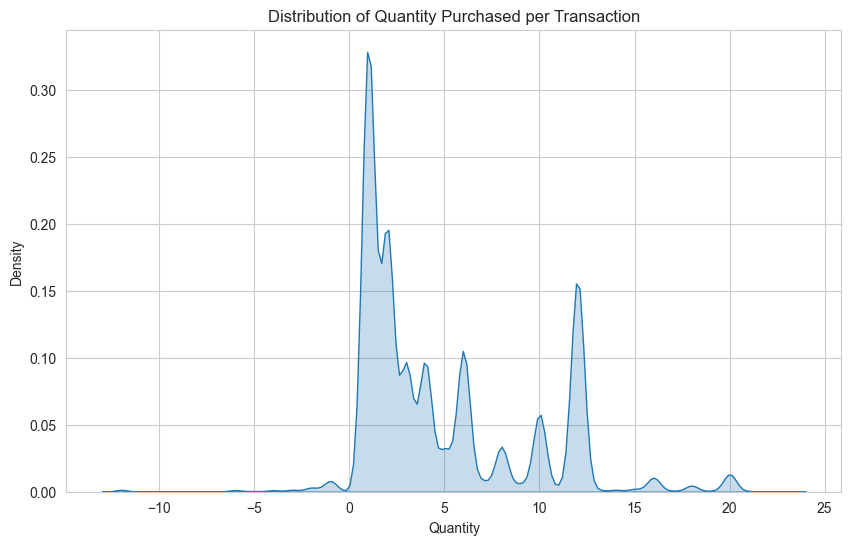

In [41]:
# Plot density plot for quantity distribution
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(crm_df['Quantity'], fill=True)
plt.title('Distribution of Quantity Purchased per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

In [42]:
crm_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,PrevPurchaseDate,DaysBetweenPurchases,PurchaseHour,Revenue
count,445025.000000,445025,445025.000000,445025.000000,445025.000000,440653,440653.000000,445025.000000,445025.000000
mean,4.805305,2011-07-04 22:15:18.283601664,2.792098,15328.545709,10.719345,2011-07-03 09:44:45.867247104,3.454884,13.158220,10.719345
min,-12.000000,2010-12-01 08:26:00,0.000000,12346.000000,-102.000000,2010-12-01 08:26:00,0.000000,6.000000,-102.000000
25%,1.000000,2011-03-27 14:28:00,1.250000,13969.000000,3.260000,2011-03-25 12:00:00,0.000000,11.000000,3.260000
50%,3.000000,2011-07-20 12:00:00,2.100000,15277.000000,7.500000,2011-07-18 15:49:00,0.000000,13.000000,7.500000
75%,8.000000,2011-10-19 16:59:00,3.750000,16818.000000,15.299999,2011-10-18 13:15:00,1.000000,15.000000,15.299999
max,23.000000,2011-12-09 12:50:00,8.620000,18287.000000,194.810013,2011-12-09 12:50:00,182.000000,20.000000,194.810013
std,4.602325,NaN,2.041368,1710.371105,12.055520,NaN,9.244483,2.426329,12.055520


# RFM score

In [43]:
crm_df['last_purchase_date'] = crm_df.groupby('CustomerID')['InvoiceDate'].transform('max')
crm_df['recency'] = (datetime.now() - crm_df['last_purchase_date']).dt.days

# Frequency: Total purchases by each customer
crm_df['frequency'] = crm_df.groupby('CustomerID')['InvoiceDate'].transform('count')

# Monetary: Total spend by each customer
crm_df['monetary'] = crm_df.groupby('CustomerID')['UnitPrice'].transform('sum')

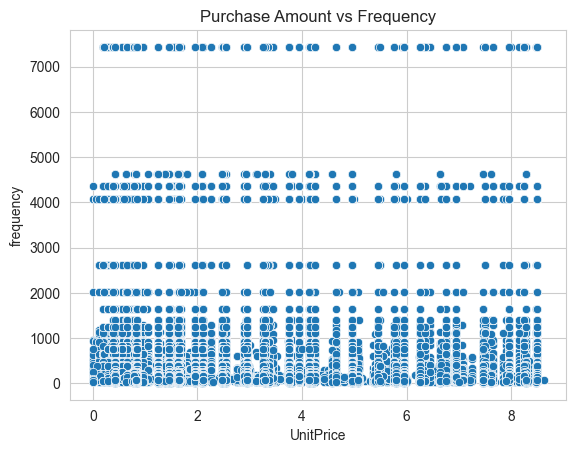

In [44]:
sns.scatterplot(data=crm_df, x='UnitPrice', y='frequency')
plt.title('Purchase Amount vs Frequency')
plt.show()

In [45]:
crm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,PrevPurchaseDate,DaysBetweenPurchases,PurchaseDay,PurchaseHour,Revenue,last_purchase_date,recency,frequency,monetary
16620,537666,22876,NUMBER TILE COTTAGE GARDEN 8,1,2010-12-07 18:36:00,4.21,12346,United Kingdom,4.21,NaT,NaN,Tuesday,18,4.21,2011-12-09 10:03:00,4726,30,93.699997
18615,537823,21195,PINK HONEYCOMB PAPER BALL,1,2010-12-08 14:25:00,4.21,12346,United Kingdom,4.21,2010-12-07 18:36:00,0.0,Wednesday,14,4.21,2011-12-09 10:03:00,4726,30,93.699997
40751,539741,22550,HOLIDAY FUN LUDO,1,2010-12-21 15:20:00,7.62,12346,United Kingdom,7.62,2010-12-08 14:25:00,13.0,Tuesday,15,7.62,2011-12-09 10:03:00,4726,30,93.699997
54029,540848,22464,HANGING METAL HEART LANTERN,1,2011-01-12 09:26:00,3.36,12346,United Kingdom,3.36,2010-12-21 15:20:00,21.0,Wednesday,9,3.36,2011-12-09 10:03:00,4726,30,93.699997
55149,540977,22174,PHOTO CUBE,1,2011-01-12 15:01:00,3.36,12346,United Kingdom,3.36,2011-01-12 09:26:00,0.0,Wednesday,15,3.36,2011-12-09 10:03:00,4726,30,93.699997


In [46]:
# Check unique values in the 'recency', 'frequency', and 'monetary' columns to confirm variability
print("Unique values in 'recency':", crm_df['recency'].nunique())
print("Unique values in 'frequency':", crm_df['frequency'].nunique())
print("Unique values in 'monetary':", crm_df['monetary'].nunique())

# Try using qcut but fallback to custom binning if there are insufficient unique values
try:
    crm_df['R'] = pd.qcut(crm_df['recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
except ValueError:
    # If qcut fails, use cut for approximate quantiles
    crm_df['R'] = pd.cut(crm_df['recency'], bins=4, labels=[4, 3, 2, 1], include_lowest=True)

try:
    crm_df['F'] = pd.qcut(crm_df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4], duplicates='drop')
except ValueError:
    crm_df['F'] = pd.cut(crm_df['frequency'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

try:
    crm_df['M'] = pd.qcut(crm_df['monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')
except ValueError:
    crm_df['M'] = pd.cut(crm_df['monetary'], bins=4, labels=[1, 2, 3, 4], include_lowest=True)

# Combine RFM segments
crm_df['RFM_Segment'] = crm_df['R'].astype(str) + crm_df['F'].astype(str) + crm_df['M'].astype(str)
crm_df['RFM_Score'] = crm_df[['R', 'F', 'M']].sum(axis=1).astype(int)

crm_df.head()


Unique values in 'recency': 41
Unique values in 'frequency': 422
Unique values in 'monetary': 4117


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,PrevPurchaseDate,...,Revenue,last_purchase_date,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score
16620,537666,22876,NUMBER TILE COTTAGE GARDEN 8,1,2010-12-07 18:36:00,4.21,12346,United Kingdom,4.21,NaT,...,4.21,2011-12-09 10:03:00,4726,30,93.699997,4,1,1,411,6
18615,537823,21195,PINK HONEYCOMB PAPER BALL,1,2010-12-08 14:25:00,4.21,12346,United Kingdom,4.21,2010-12-07 18:36:00,...,4.21,2011-12-09 10:03:00,4726,30,93.699997,4,1,1,411,6
40751,539741,22550,HOLIDAY FUN LUDO,1,2010-12-21 15:20:00,7.62,12346,United Kingdom,7.62,2010-12-08 14:25:00,...,7.62,2011-12-09 10:03:00,4726,30,93.699997,4,1,1,411,6
54029,540848,22464,HANGING METAL HEART LANTERN,1,2011-01-12 09:26:00,3.36,12346,United Kingdom,3.36,2010-12-21 15:20:00,...,3.36,2011-12-09 10:03:00,4726,30,93.699997,4,1,1,411,6
55149,540977,22174,PHOTO CUBE,1,2011-01-12 15:01:00,3.36,12346,United Kingdom,3.36,2011-01-12 09:26:00,...,3.36,2011-12-09 10:03:00,4726,30,93.699997,4,1,1,411,6


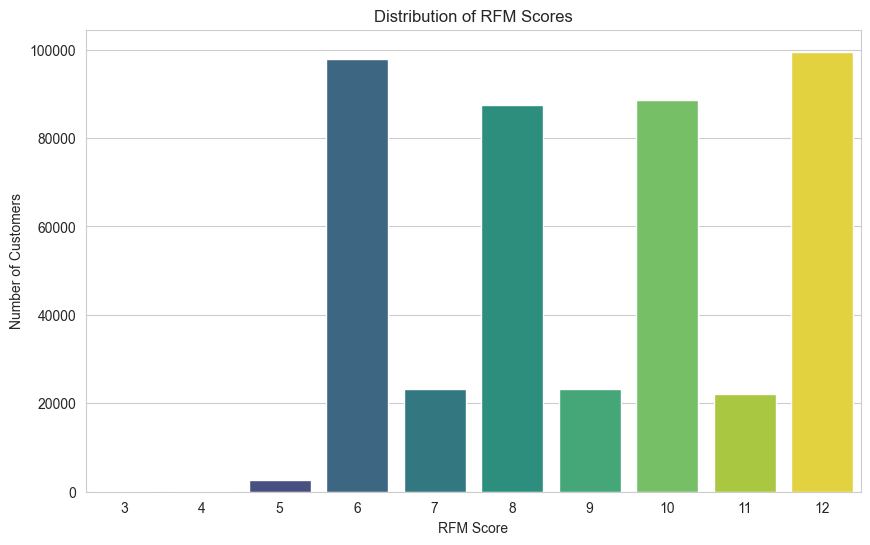

In [47]:
# Plot distribution of RFM scores
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x='RFM_Score', hue='RFM_Score', data=crm_df, palette='viridis', legend=False)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
# Set the InvoiceDate as the index and resample monthly
crm_df.set_index('InvoiceDate', inplace=True)
monthly_transactions = crm_df['InvoiceNo'].resample('ME').nunique()

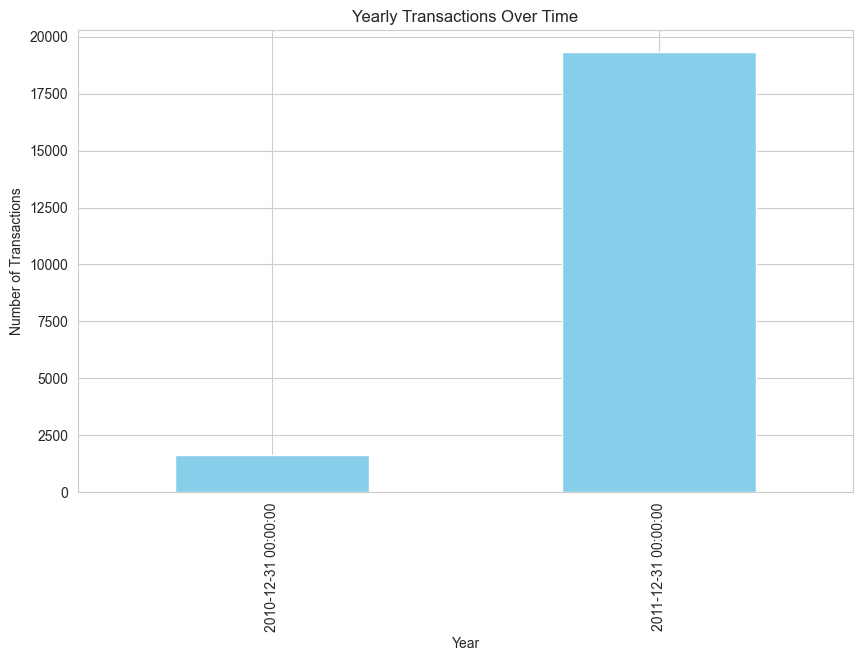

In [49]:
# Resample data yearly
yearly_transactions = crm_df['InvoiceNo'].resample('YE').nunique()

# Plot yearly transaction count
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
yearly_transactions.plot(kind='bar', color='skyblue')
plt.title('Yearly Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


In [50]:
# Calculate average RFM attributes for each segment
persona_summary = crm_df.groupby('RFM_Segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
}).reset_index()

# Define spending levels for each persona
persona_summary['Avg_Spend'] = persona_summary['monetary']
persona_summary['Avg_Frequency'] = persona_summary['frequency']
persona_summary['Avg_Recency'] = persona_summary['recency']

persona_summary.head()


,RFM_Segment,recency,frequency,monetary,Avg_Spend,Avg_Frequency,Avg_Recency
0,111,4795.143836,30.424658,97.724998,97.724998,30.424658,4795.143836
1,211,4774.295238,47.542857,133.841904,133.841904,47.542857,4774.295238
2,222,4769.683168,103.534653,288.596100,288.596100,103.534653,4769.683168
3,233,4766.000000,275.000000,629.729980,629.729980,275.000000,4766.000000
4,311,4751.153965,40.623985,122.175133,122.175133,40.623985,4751.153965


In [51]:
# Define a mapping between the RFM codes and the personas
rfm_mapping = {
    '111': 'Champions',
    '121': 'Loyal Customers',
    '211': 'At-Risk Customers',
    '221': 'New Customers'
}


In [52]:
personas = {
    "Champions": {
        "Avg_Spend": persona_summary[persona_summary['RFM_Segment'] == '111']['Avg_Spend'].values[0] if '111' in persona_summary['RFM_Segment'].values else None,
        "Avg_Frequency": persona_summary[persona_summary['RFM_Segment'] == '111']['Avg_Frequency'].values[0] if '111' in persona_summary['RFM_Segment'].values else None,
        "Avg_Recency": persona_summary[persona_summary['RFM_Segment'] == '111']['Avg_Recency'].values[0] if '111' in persona_summary['RFM_Segment'].values else None,
        "Description": "High-spending, frequent customers with recent purchases.",
        "Suggested_Strategy": "Offer loyalty rewards, VIP experiences, or early access to sales."
    },
    "Loyal Customers": {
        "Avg_Spend": None,  # No '121' segment in persona_summary
        "Avg_Frequency": None,
        "Avg_Recency": None,
        "Description": "Customers who buy frequently but may not be top spenders.",
        "Suggested_Strategy": "Send loyalty discounts or exclusive deals to maintain engagement."
    },
    "At-Risk Customers": {
        "Avg_Spend": None,  # No '211' segment in persona_summary
        "Avg_Frequency": None,
        "Avg_Recency": None,
        "Description": "Customers who haven’t bought recently but used to be frequent or high spenders.",
        "Suggested_Strategy": "Use targeted promotions, such as limited-time offers, to re-engage."
    },
    "New Customers": {
        "Avg_Spend": None,  # No '221' segment in persona_summary
        "Avg_Frequency": None,
        "Avg_Recency": None,
        "Description": "Recently acquired customers who may not have made repeat purchases yet.",
        "Suggested_Strategy": "Offer onboarding discounts, special offers, or educational content to build loyalty."
    },
    "Potential Loyalists": {
        "Avg_Spend": persona_summary[persona_summary['RFM_Segment'] == '312']['Avg_Spend'].values[0] if '312' in persona_summary['RFM_Segment'].values else None,
        "Avg_Frequency": persona_summary[persona_summary['RFM_Segment'] == '312']['Avg_Frequency'].values[0] if '312' in persona_summary['RFM_Segment'].values else None,
        "Avg_Recency": persona_summary[persona_summary['RFM_Segment'] == '312']['Avg_Recency'].values[0] if '312' in persona_summary['RFM_Segment'].values else None,
        "Description": "Customers showing promise of loyalty with good spending and recent activity.",
        "Suggested_Strategy": "Send personalized offers or early access promotions to solidify loyalty."
    },
    "Promising": {
        "Avg_Spend": persona_summary[persona_summary['RFM_Segment'] == '322']['Avg_Spend'].values[0] if '322' in persona_summary['RFM_Segment'].values else None,
        "Avg_Frequency": persona_summary[persona_summary['RFM_Segment'] == '322']['Avg_Frequency'].values[0] if '322' in persona_summary['RFM_Segment'].values else None,
        "Avg_Recency": persona_summary[persona_summary['RFM_Segment'] == '322']['Avg_Recency'].values[0] if '322' in persona_summary['RFM_Segment'].values else None,
        "Description": "Customers with potential for growth based on their purchases.",
        "Suggested_Strategy": "Nurture with targeted communication and value-based incentives."
    }
}


In [53]:
for persona, details in personas.items():
    if details['Avg_Spend'] is not None:  
        print(f"Persona: {persona}")
        print(f" - Avg Spend: ${details['Avg_Spend']:.2f}")
        print(f" - Avg Frequency: {details['Avg_Frequency']:.2f}")
        print(f" - Avg Recency: {details['Avg_Recency']:.2f} days")
        print(f" - Description: {details['Description']}")
        print(f" - Suggested Strategy: {details['Suggested_Strategy']}\n")
    else:
        print(f"Persona: {persona} - No data available for this segment.\n")

Persona: Champions
 - Avg Spend: $97.72
 - Avg Frequency: 30.42
 - Avg Recency: 4795.14 days
 - Description: High-spending, frequent customers with recent purchases.
 - Suggested Strategy: Offer loyalty rewards, VIP experiences, or early access to sales.

Persona: Loyal Customers - No data available for this segment.

Persona: At-Risk Customers - No data available for this segment.

Persona: New Customers - No data available for this segment.

Persona: Potential Loyalists
 - Avg Spend: $240.29
 - Avg Frequency: 58.00
 - Avg Recency: 4747.50 days
 - Description: Customers showing promise of loyalty with good spending and recent activity.
 - Suggested Strategy: Send personalized offers or early access promotions to solidify loyalty.

Persona: Promising
 - Avg Spend: $306.08
 - Avg Frequency: 109.32
 - Avg Recency: 4749.17 days
 - Description: Customers with potential for growth based on their purchases.
 - Suggested Strategy: Nurture with targeted communication and value-based incentives

In [54]:
# Calculate revenue by customer segment
revenue_by_segment = crm_df.groupby('RFM_Segment')['Revenue'].sum().reset_index()
print("Revenue by Customer Segment:\n", revenue_by_segment)

Revenue by Customer Segment:
    RFM_Segment       Revenue
0          111  1.720260e+03
1          211  2.393200e+03
2          222  1.526140e+03
3          233  2.263710e+03
4          311  2.850536e+04
5          312  1.878870e+03
6          321  3.293840e+03
7          322  2.041056e+04
8          323  2.061470e+03
9          332  1.537960e+03
10         333  1.034070e+03
11         344  1.021597e+04
12         411  9.947544e+05
13         412  1.471675e+05
14         421  9.773338e+04
15         422  1.006105e+06
16         423  1.829006e+05
17         432  1.001141e+05
18         433  1.009388e+06
19         434  1.618755e+05
20         443  6.613937e+04
21         444  9.273572e+05


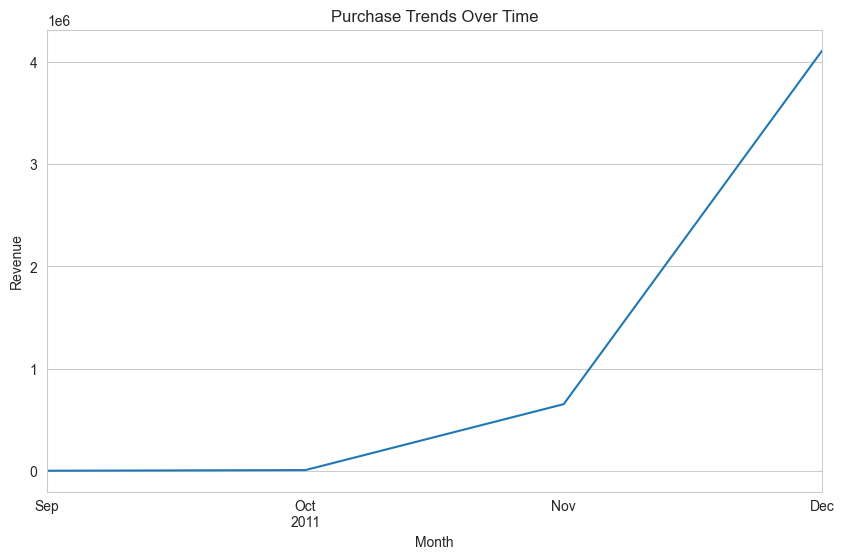

In [55]:
# Resample the data by month and sum the revenue per month
monthly_trends = crm_df.resample('ME', on='last_purchase_date')['Revenue'].sum()
plt.figure(figsize=(10, 6))
monthly_trends.plot()
plt.title('Purchase Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [56]:

crm_df['R'] = crm_df['R'].astype(int)
crm_df['F'] = crm_df['F'].astype(int)
crm_df['M'] = crm_df['M'].astype(float) 


crm_df['CLV'] = crm_df['frequency'] * crm_df['monetary']
crm_df['CLV_based_on_RFM'] = crm_df['R'] * crm_df['F'] * crm_df['M']
clv_predictions = crm_df[['CustomerID', 'CLV', 'CLV_based_on_RFM']].drop_duplicates()

print("Customer Lifetime Value Predictions:\n", clv_predictions.head())


Customer Lifetime Value Predictions:
                      CustomerID           CLV  CLV_based_on_RFM
InvoiceDate                                                    
2010-12-07 18:36:00       12346   2810.999908               4.0
2010-12-01 14:32:00       12347  94716.062622              36.0
2010-12-08 14:25:00       12348    710.279984               4.0
2010-12-03 11:36:00       12349  27145.298889              16.0
2010-12-01 17:06:00       12350   5580.110184               4.0
